<a href="https://colab.research.google.com/github/diegorossi8/Estatistica-e-Ciencia-de-Dados-Morettin-e-Singer/blob/master/Exercicios_Cap_4_Estatistica_e_Ciencia_de_dados_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Arquivos em Excel, com exemplos práticos oriundos de consultorias dos autores-20240823/empresa.xls', header = 1)

In [3]:
df.dtypes


,0
N,int64
Estado Civil,object
Grau de Instrução,object
N de Filhos,float64
Salario (x Sal Min),float64
Anos,int64
Meses,int64
Região de Procedência,object


In [4]:
#Exercicio 1
import plotly.express as px


# Criando histogramas e sobrepondo
fig = px.histogram(df, x=["Estado Civil", "Grau de Instrução","Região de Procedência"],
                   barmode='overlay',
                   color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [5]:
#Exercicio 2
df = pd.read_excel('/content/drive/MyDrive/Arquivos em Excel, com exemplos práticos oriundos de consultorias dos autores-20240823/regioes.xlsx', header = 0)

In [6]:
df.rename(columns={'Unnamed: 0': 'Região','Unnamed: 1':'Estados' }, inplace=True)

In [7]:
mask = (df['Região'] != 'Brasil') & df['Região'].notna()
df = df.loc[mask]

In [8]:
df.columns

Index(['Região', 'Estados', 'Superfície', 'População', 'Densidade'], dtype='object')


O que cada coluna significa:

sum_sq: Soma dos quadrados dos desvios. Indica a variabilidade total explicada pelo modelo (Região) e pelos resíduos (erro).
df: Graus de liberdade. Representa o número de parâmetros independentes no modelo.
F: Estatística F. Compara a variabilidade entre os grupos (Região) com a variabilidade dentro dos grupos (resíduos).
PR(>F): Valor-p. Indica a probabilidade de obtermos um valor F tão extremo ou mais extremo, assumindo que não há diferença entre as médias das regiões.
Interpretando seus Resultados:

Hipótese nula (H0): As médias das densidades nas diferentes regiões são iguais.
Hipótese alternativa (H1): Pelo menos uma das médias das densidades nas regiões é diferente.
Conclusão:

Dado que o valor-p (PR(>F)) é 0.148634, que é maior que o nível de significância convencional de 0.05, não rejeitamos a hipótese nula. Isso significa que não há evidência estatística suficiente para concluir que as médias das densidades são significativamente diferentes entre as regiões.

Em outras palavras:

As diferenças observadas nas densidades entre as regiões podem ser atribuídas ao acaso e não a uma diferença real nas médias populacionais.

O que isso significa para sua análise:

Não há diferença significativa: As regiões não apresentam diferenças significativas em termos de densidade.
Outras variáveis: Pode haver outras variáveis que influenciam a densidade e que não foram consideradas nesta análise.
Tamanho da amostra: Um tamanho de amostra maior poderia aumentar o poder do teste e permitir detectar diferenças menores, se elas existissem.




In [9]:
import pandas as pd
import plotly.express as px


# Boxplot interativo
fig = px.box(df, x="Região", y="Densidade", color="Região", title="Comparação da Densidade por Região")
fig.show()

# Histograma interativo
fig = px.histogram(df, x="Densidade", color="Região", barmode='group',
                   title="Distribuição da Densidade por Região")
fig.show()

# ANOVA (assumindo que 'Densidade' seja numérica)
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Densidade ~ Região', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq    df         F    PR(>F)
Região     68383.248287   4.0  1.886306  0.148634
Residual  199388.528657  22.0       NaN       NaN


In [14]:
df = pd.read_excel('/content/drive/MyDrive/Arquivos em Excel, com exemplos práticos oriundos de consultorias dos autores-20240823/salarios.xls', header = 4)

In [18]:
df.columns

Index(['Cidade', 'Prof. Sec.', 'Mecânico', 'Administrador', 'Eng. Eletr.'], dtype='object')

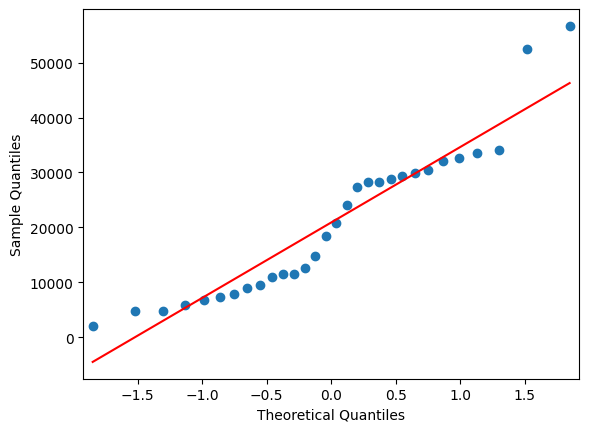

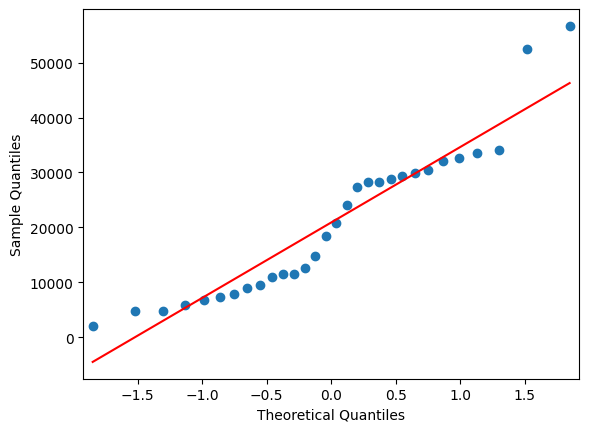

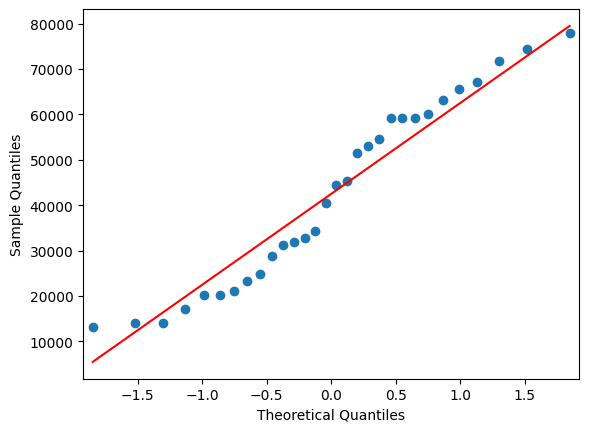

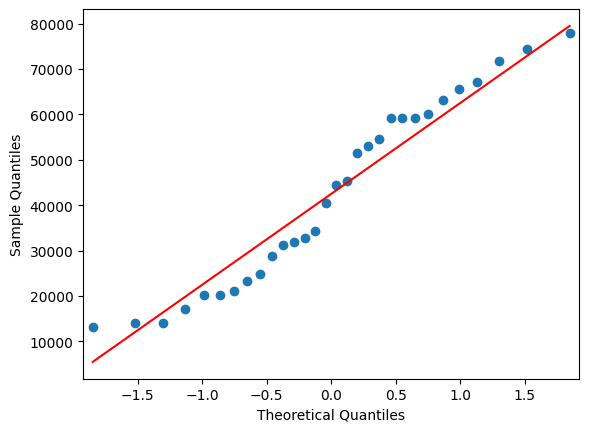

In [19]:
import plotly.express as px
import statsmodels.api as sm

# Extraindo as colunas desejadas
prof_sec = df['Prof. Sec.']
administrador = df['Administrador']

# Criando o gráfico QQ
fig = px.scatter(x=sm.qqplot(prof_sec, line='s').gca().get_lines()[0].get_xdata(),
                 y=sm.qqplot(prof_sec, line='s').gca().get_lines()[0].get_ydata(),
                 labels={'x': 'Quantis Teóricos', 'y': 'Quantis Observados'},
                 title='Gráfico QQ - Prof. Sec.')
fig.add_scatter(x=sm.qqplot(administrador, line='s').gca().get_lines()[0].get_xdata(),
                y=sm.qqplot(administrador, line='s').gca().get_lines()[0].get_ydata(),
                mode='markers',
                name='Administrador')
fig.show()

In [20]:
from scipy.stats import pearsonr

# Substitua 'coluna1' e 'coluna2' pelos nomes das colunas desejadas
coluna1 = df['Prof. Sec.']
coluna2 = df['Administrador']

corr, p_valor = pearsonr(coluna1, coluna2)

print("Coeficiente de correlação de Pearson:", corr)
print("Valor-p:", p_valor)

Coeficiente de correlação de Pearson: 0.7528871516132553
Valor-p: 1.586248755647822e-06


Com base nos resultados que você forneceu:

Coeficiente de correlação de Pearson: 0.7528871516132553 indica uma forte correlação positiva entre as duas variáveis analisadas. Isso sugere que quando uma variável aumenta, a outra também tende a aumentar.
Valor-p: 1.586248755647822e-06 é muito menor que o nível de significância alfa = 0.10.
Conclusão:

Rejeitamos a hipótese nula de que não há correlação. Há forte evidência estatística para concluir que existe uma correlação positiva significativa entre as duas variáveis.